ask 1: Exploratory Data Analysis (EDA) and Business Insights 
1. Perform EDA on the provided dataset. 
2. Derive at least 5 business insights from the EDA. 
○ Write these insights in short point-wise sentences (maximum 100 words per 
insight). 
Deliverables: 
● A Python script containing your EDA code. 
● A report with business insights (maximum 500 words).

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
customers = pd.read_csv("Customers.csv")
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [172]:
products = pd.read_csv("Products.csv")
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [176]:
transactions = pd.read_csv("Transactions.csv")
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [178]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [180]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [182]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [184]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [188]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [190]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [69]:
# Checking for duplicate rows in each dataset
duplicate_customers = customers.duplicated().sum()
duplicate_customers

0

In [71]:
duplicate_products = products.duplicated().sum()
duplicate_products

0

In [73]:
duplicate_transactions = transactions.duplicated().sum()
duplicate_transactions

0

In [75]:
# Checking for missing values in each dataset
missing_customers = customers.isnull().sum()
missing_customers

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [77]:
missing_products = products.isnull().sum()
missing_products

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [79]:
missing_transactions = transactions.isnull().sum()
missing_transactions

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [93]:
# Summarizing results
{
    "Duplicates": {
        "Customers": duplicate_customers,
        "Products": duplicate_products,
        "Transactions": duplicate_transactions
    },
    "Missing Values": {
        "Customers": missing_customers.to_dict(),
        "Products": missing_products.to_dict(),
        "Transactions": missing_transactions.to_dict()
    }
}


{'Duplicates': {'Customers': 0, 'Products': 0, 'Transactions': 0},
 'Missing Values': {'Customers': {'CustomerID': 0,
   'CustomerName': 0,
   'Region': 0,
   'SignupDate': 0},
  'Products': {'ProductID': 0, 'ProductName': 0, 'Category': 0, 'Price': 0},
  'Transactions': {'TransactionID': 0,
   'CustomerID': 0,
   'ProductID': 0,
   'TransactionDate': 0,
   'Quantity': 0,
   'TotalValue': 0,
   'Price': 0}}}

In [96]:
# Setting visualization style
sns.set(style="whitegrid")


In [99]:
# EDA Summary Statistics
customers_summary = customers['Region'].value_counts()
customers_summary

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

In [101]:
products_summary = products['Category'].value_counts()
products_summary

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

In [103]:
transactions_summary = transactions.describe()
transactions_summary

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


In [137]:
# Summarizing insights from above analysis
{
    "Customer Region Distribution": customers_summary.to_dict(),
    "Product Category Distribution": products_summary.to_dict(),
    "Transaction Statistics": transactions_summary.to_dict()
}

{'Customer Region Distribution': {'South America': 59,
  'Europe': 50,
  'North America': 46,
  'Asia': 45},
 'Product Category Distribution': {'Books': 26,
  'Electronics': 26,
  'Clothing': 25,
  'Home Decor': 23},
 'Transaction Statistics': {'TransactionDate': {'count': 1000,
   'mean': Timestamp('2024-06-23 15:33:02.768999936'),
   'min': Timestamp('2023-12-30 15:29:12'),
   '25%': Timestamp('2024-03-25 22:05:34.500000'),
   '50%': Timestamp('2024-06-26 17:21:52.500000'),
   '75%': Timestamp('2024-09-19 14:19:57'),
   'max': Timestamp('2024-12-28 11:00:00'),
   'std': nan},
  'Quantity': {'count': 1000.0,
   'mean': 2.537,
   'min': 1.0,
   '25%': 2.0,
   '50%': 3.0,
   '75%': 4.0,
   'max': 4.0,
   'std': 1.117980715791143},
  'TotalValue': {'count': 1000.0,
   'mean': 689.9955600000001,
   'min': 16.08,
   '25%': 295.29499999999996,
   '50%': 588.88,
   '75%': 1011.66,
   'max': 1991.04,
   'std': 493.14447754793144},
  'Price': {'count': 1000.0,
   'mean': 272.55407,
   'min': 1

C:\Users\DELL INDIA\AppData\Local\Temp\ipykernel_21924\1701672676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, y="Region", order=customers['Region'].value_counts().index, palette="mako")


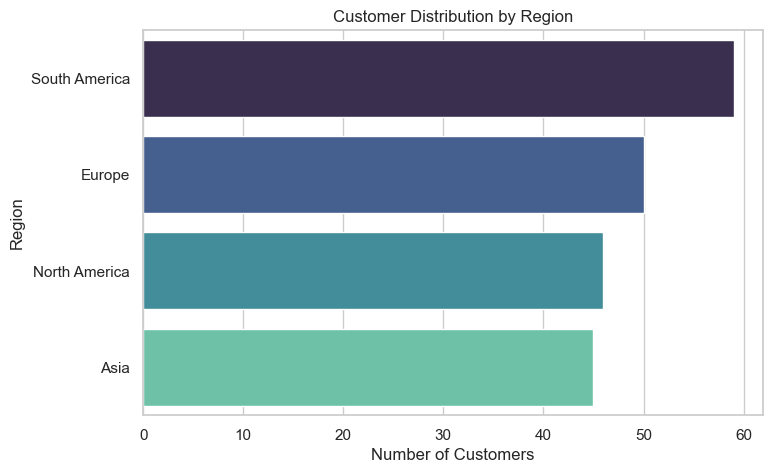

In [131]:
# Plotting: Distribution of regions
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, y="Region", order=customers['Region'].value_counts().index, palette="mako")
plt.title("Customer Distribution by Region")
plt.xlabel("Number of Customers")
plt.ylabel("Region")
plt.show()


C:\Users\DELL INDIA\AppData\Local\Temp\ipykernel_21924\2412890160.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, y="Category", order=products['Category'].value_counts().index, palette="rocket")


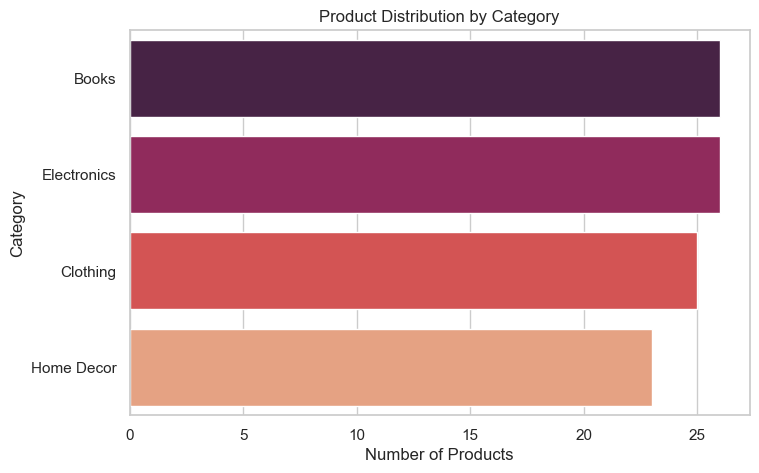

In [135]:
# Plotting: Product categories distribution

plt.figure(figsize=(8, 5))
sns.countplot(data=products, y="Category", order=products['Category'].value_counts().index, palette="rocket")
plt.title("Product Distribution by Category")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.show()

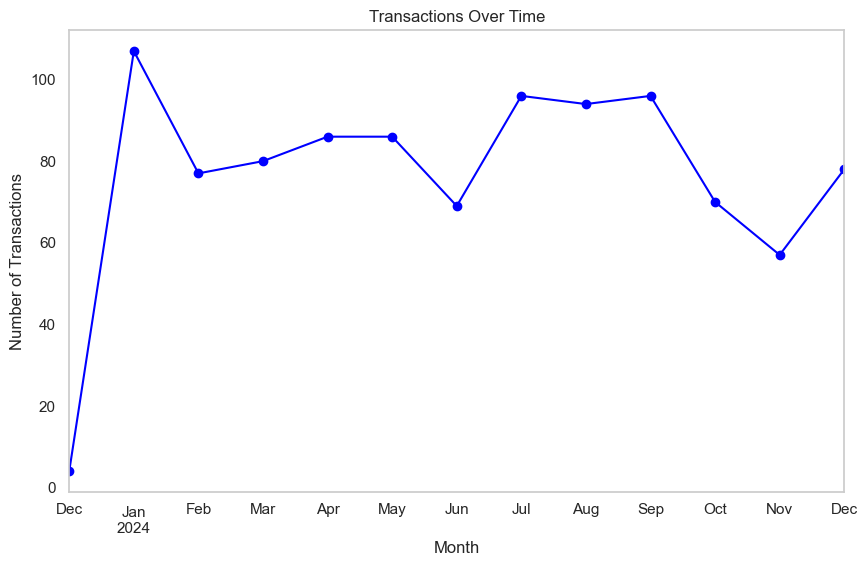

In [133]:
# Time-based transaction trends
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

plt.figure(figsize=(10, 6))
transactions.groupby('Month').size().plot(kind='line', marker='o', color='blue')
plt.title("Transactions Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid()
plt.show()


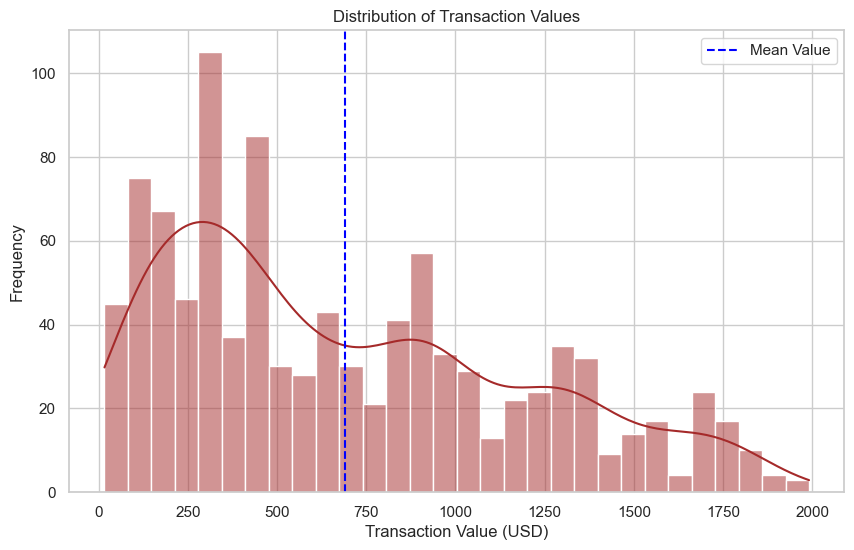

In [151]:
# High-Value Transactions: Distribution of total transaction values
plt.figure(figsize=(10, 6))
sns.histplot(transactions['TotalValue'], kde=True, color="brown", bins=30)  # Changed color to green
plt.title("Distribution of Transaction Values")
plt.xlabel("Transaction Value (USD)")
plt.ylabel("Frequency")
plt.axvline(transactions['TotalValue'].mean(), color='blue', linestyle='--', label='Mean Value')
plt.legend()
plt.show()


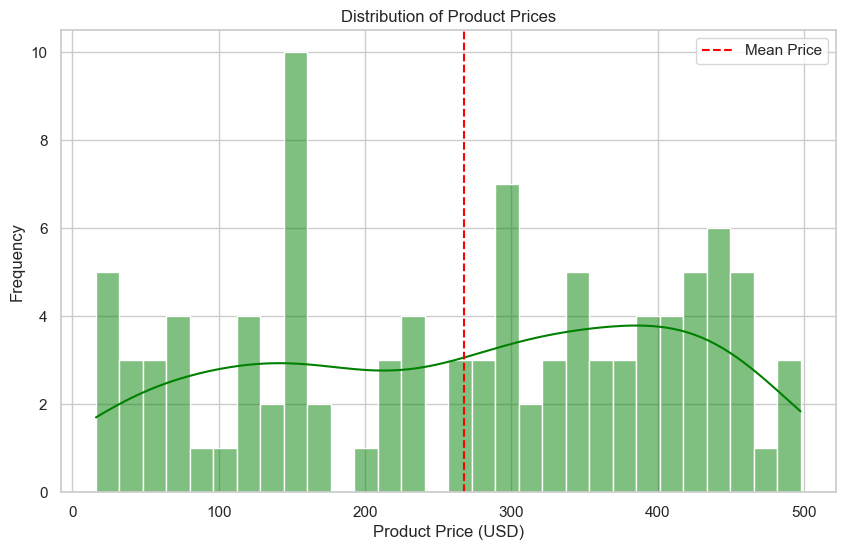

In [125]:
# Price Optimization: Distribution of product prices
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], kde=True, color="green", bins=30)
plt.title("Distribution of Product Prices")
plt.xlabel("Product Price (USD)")
plt.ylabel("Frequency")
plt.axvline(products['Price'].mean(), color='red', linestyle='--', label='Mean Price')
plt.legend()
plt.show()